In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from core.utils import full_file_path

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay, roc_auc_score

In [2]:
np.random.seed(42)

sns.set()

In [3]:
file_path = full_file_path('dados_modelagem.csv', 'generated_data')
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.sample(3)

,secretaria_governo,capital,cidade_grande,estrangeiro,reside_fora_sp,profissao_terceiro_setor,profissao_jornalista,profissao_academia,profissao_partido_politico,profissao_servidor_publico,...,pedido_pessoal,mulher,escol_doutorado,escol_ensino_fundamental,escol_ensino_médio,escol_ensino_superior,escol_especialização,escol_mestrado,escol_sem_instrução_formal,nao_atendidas
4720,False,True,False,False,False,False,False,False,False,False,...,False,True,0,0,0,0,0,0,0,True
5234,False,False,False,False,True,False,False,False,False,False,...,False,True,0,0,0,1,0,0,0,True
2085,False,True,False,False,False,False,False,False,False,False,...,False,True,0,0,1,0,0,0,0,True


In [6]:
df['ensino_superior'] = df['escol_ensino_superior'] + df['escol_especialização'] + df['escol_doutorado'] + df['escol_mestrado']

In [7]:
df['cidade_grande'] = df['cidade_grande'] + df['capital']

In [8]:
cols = ['mulher', 'capital', 'cidade_grande', 'profissao_jornalista', 'ensino_superior', 'nao_atendidas']

In [9]:
df = df[cols]

In [10]:
y = df['nao_atendidas']
X = df.drop('nao_atendidas', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Modelo baseline - Regressao Logistica

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
clf = LogisticRegression()

In [13]:
clf.fit(X_train, y_train)

LogisticRegression()

In [14]:
clf.score(X_train, y_train)

0.5295535527143157

In [15]:
def eval_train(clf):
    
    pred_train = clf.predict(X_train)
    cm = confusion_matrix(y_train, pred_train)
    
    print('Confusion Matrix:')
    print(cm)
    
    auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
    print(f'Auc score: {auc}')
    
    fpr, tpr, thresholds = roc_curve(y_train, pred_train)
    estim_name = str(clf).replace('(', '').replace(')', '')
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc,
                    estimator_name=estim_name)
                                      
    display.plot()

Confusion Matrix:
[[2105 2696]
 [1793 2948]]
Auc score: 0.5367580560560464


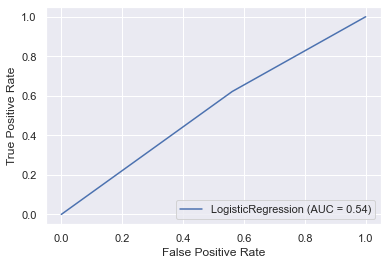

In [16]:
eval_train(clf)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf = DecisionTreeClassifier(random_state=42)

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
clf.score(X_train, y_train)

0.5310207503667994

Confusion Matrix:
[[2117 2684]
 [1791 2950]]
Auc score: 0.5422918202242986


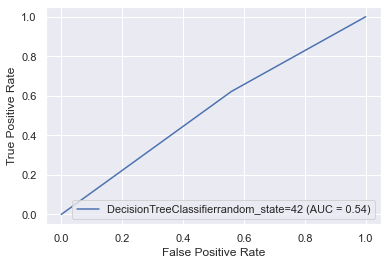

In [21]:
eval_train(clf)

In [22]:
clf.tree_

In [23]:
clf.tree_.node_count

45

In [24]:
clf.tree_.n_leaves

23

In [25]:
clf.tree_.max_depth

5

In [26]:
cross_val_score(clf, X_train, y_train, cv=10)

array([0.51308901, 0.50994764, 0.5408805 , 0.53878407, 0.51991614,
       0.54716981, 0.53563941, 0.5115304 , 0.53459119, 0.52096436])